## 인공지능과 미래사회(Ⅳ. 미래를 위한 인공지능) 실습 - 모델 학습 및 모델 평가

  1. 작업 환경 설정<br>
   * Colab 에서 수정 → 노트설정 → T4 GPU 로 셋팅되어 있는지 확인<br>
   * ultralytics 라이브러리 설치하기 - ultralytics 는 YOLO 알고리즘 개발 회사<br>
   * 구글 드라이브 마운트 - 데이터 세트 및 모델 저장을 위한 환경 설정<br>
  2. 데이터 세트 준비<br>
  3. 모델 학습
  4. 모델 평가

 ### 1. 작업 환경 설정
  - https://github.com/ultralytics/ultralytics/tree/main?tab=readme-ov-file
  - https://ultralytics.com/

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.156 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.13
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                41.7/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.2.1>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.15.3>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm                ✅ 4.67.

In [3]:
# 구글 드라이브를 g_drive로 마운트
from google.colab import drive
drive.mount('/content/g_drive')

Mounted at /content/g_drive


In [4]:
import os, sys

# soft link로 구글 드라이브의 루트 디렉토리를 mydrive로 연결 설정
!ln -s "/content/g_drive/My Drive" /mydrive

# 구글 드라이브에 yolo_workdir 폴더 생성
!mkdir "/mydrive/yolo_workdir"

mkdir: cannot create directory ‘/mydrive/yolo_workdir’: File exists


### 2. 데이터 세트 준비<br>
* PS_dataset.zip 파일 코랩에 업로드 한다. (구글 드라이브 업로드 해두고 다운로드 해도 됨)

In [5]:
# 압축파일 PS_dataset.zip 을 dataset 폴더에 풀기
!unzip /content/data-1.zip -d /content/dataset

Archive:  /content/data-1.zip
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
  inflating: /content/dataset/test/images/00f3571f-16_X220_C556_0114_1.jpg  
  inflating: /content/dataset/test/images/01ea03d7-23_X003_C012_1016_1.jpg  
  inflating: /content/dataset/test/images/02b88fd8-23_X003_C012_1111_2.jpg  
  inflating: /content/dataset/test/images/02c7394b-23_X002_C802_0221_0.jpg  
  inflating: /content/dataset/test/images/02ce913c-22_X017_C900_1104_3.jpg  
  inflating: /content/dataset/test/images/03c6d13e-24_X107_C099_0320_4.jpg  
  inflating: /content/dataset/test/images/0a1af5c4-16_X326_C509_0401_1.jpg  
  inflating: /content/dataset/test/images/0a239902-23_X002_C208_1030_2.jpg  
  inflating: /content/dataset/test/images/0a7a6001-22_X001_C173_1007_2.jpg  
  inflating: /content/dataset/test/images/0ad65b38-16_X169_C976_0325_2.jpg  
  inflating: /content/dataset/test/images/0b0b2ade-16_X163_C976_0325_4.jpg  
  

### 3. 모델 학습

In [ ]:
# yaml 파일 경로 주의
!yolo task=detect mode=train model=yolov8m.pt data=/content/dataset/data.yaml epochs=100 batch=16 imgsz=640 \
project=/mydrive/yolo_workdir

100% 49.7M/49.7M [00:00<00:00, 321MB/s]
Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train16, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

### 4. 모델 평가

* 학습 중 검증 과정에 대한 confusion_matrix.png, results.png 확인 <br>
yolo_workdir 에서도 보여주기

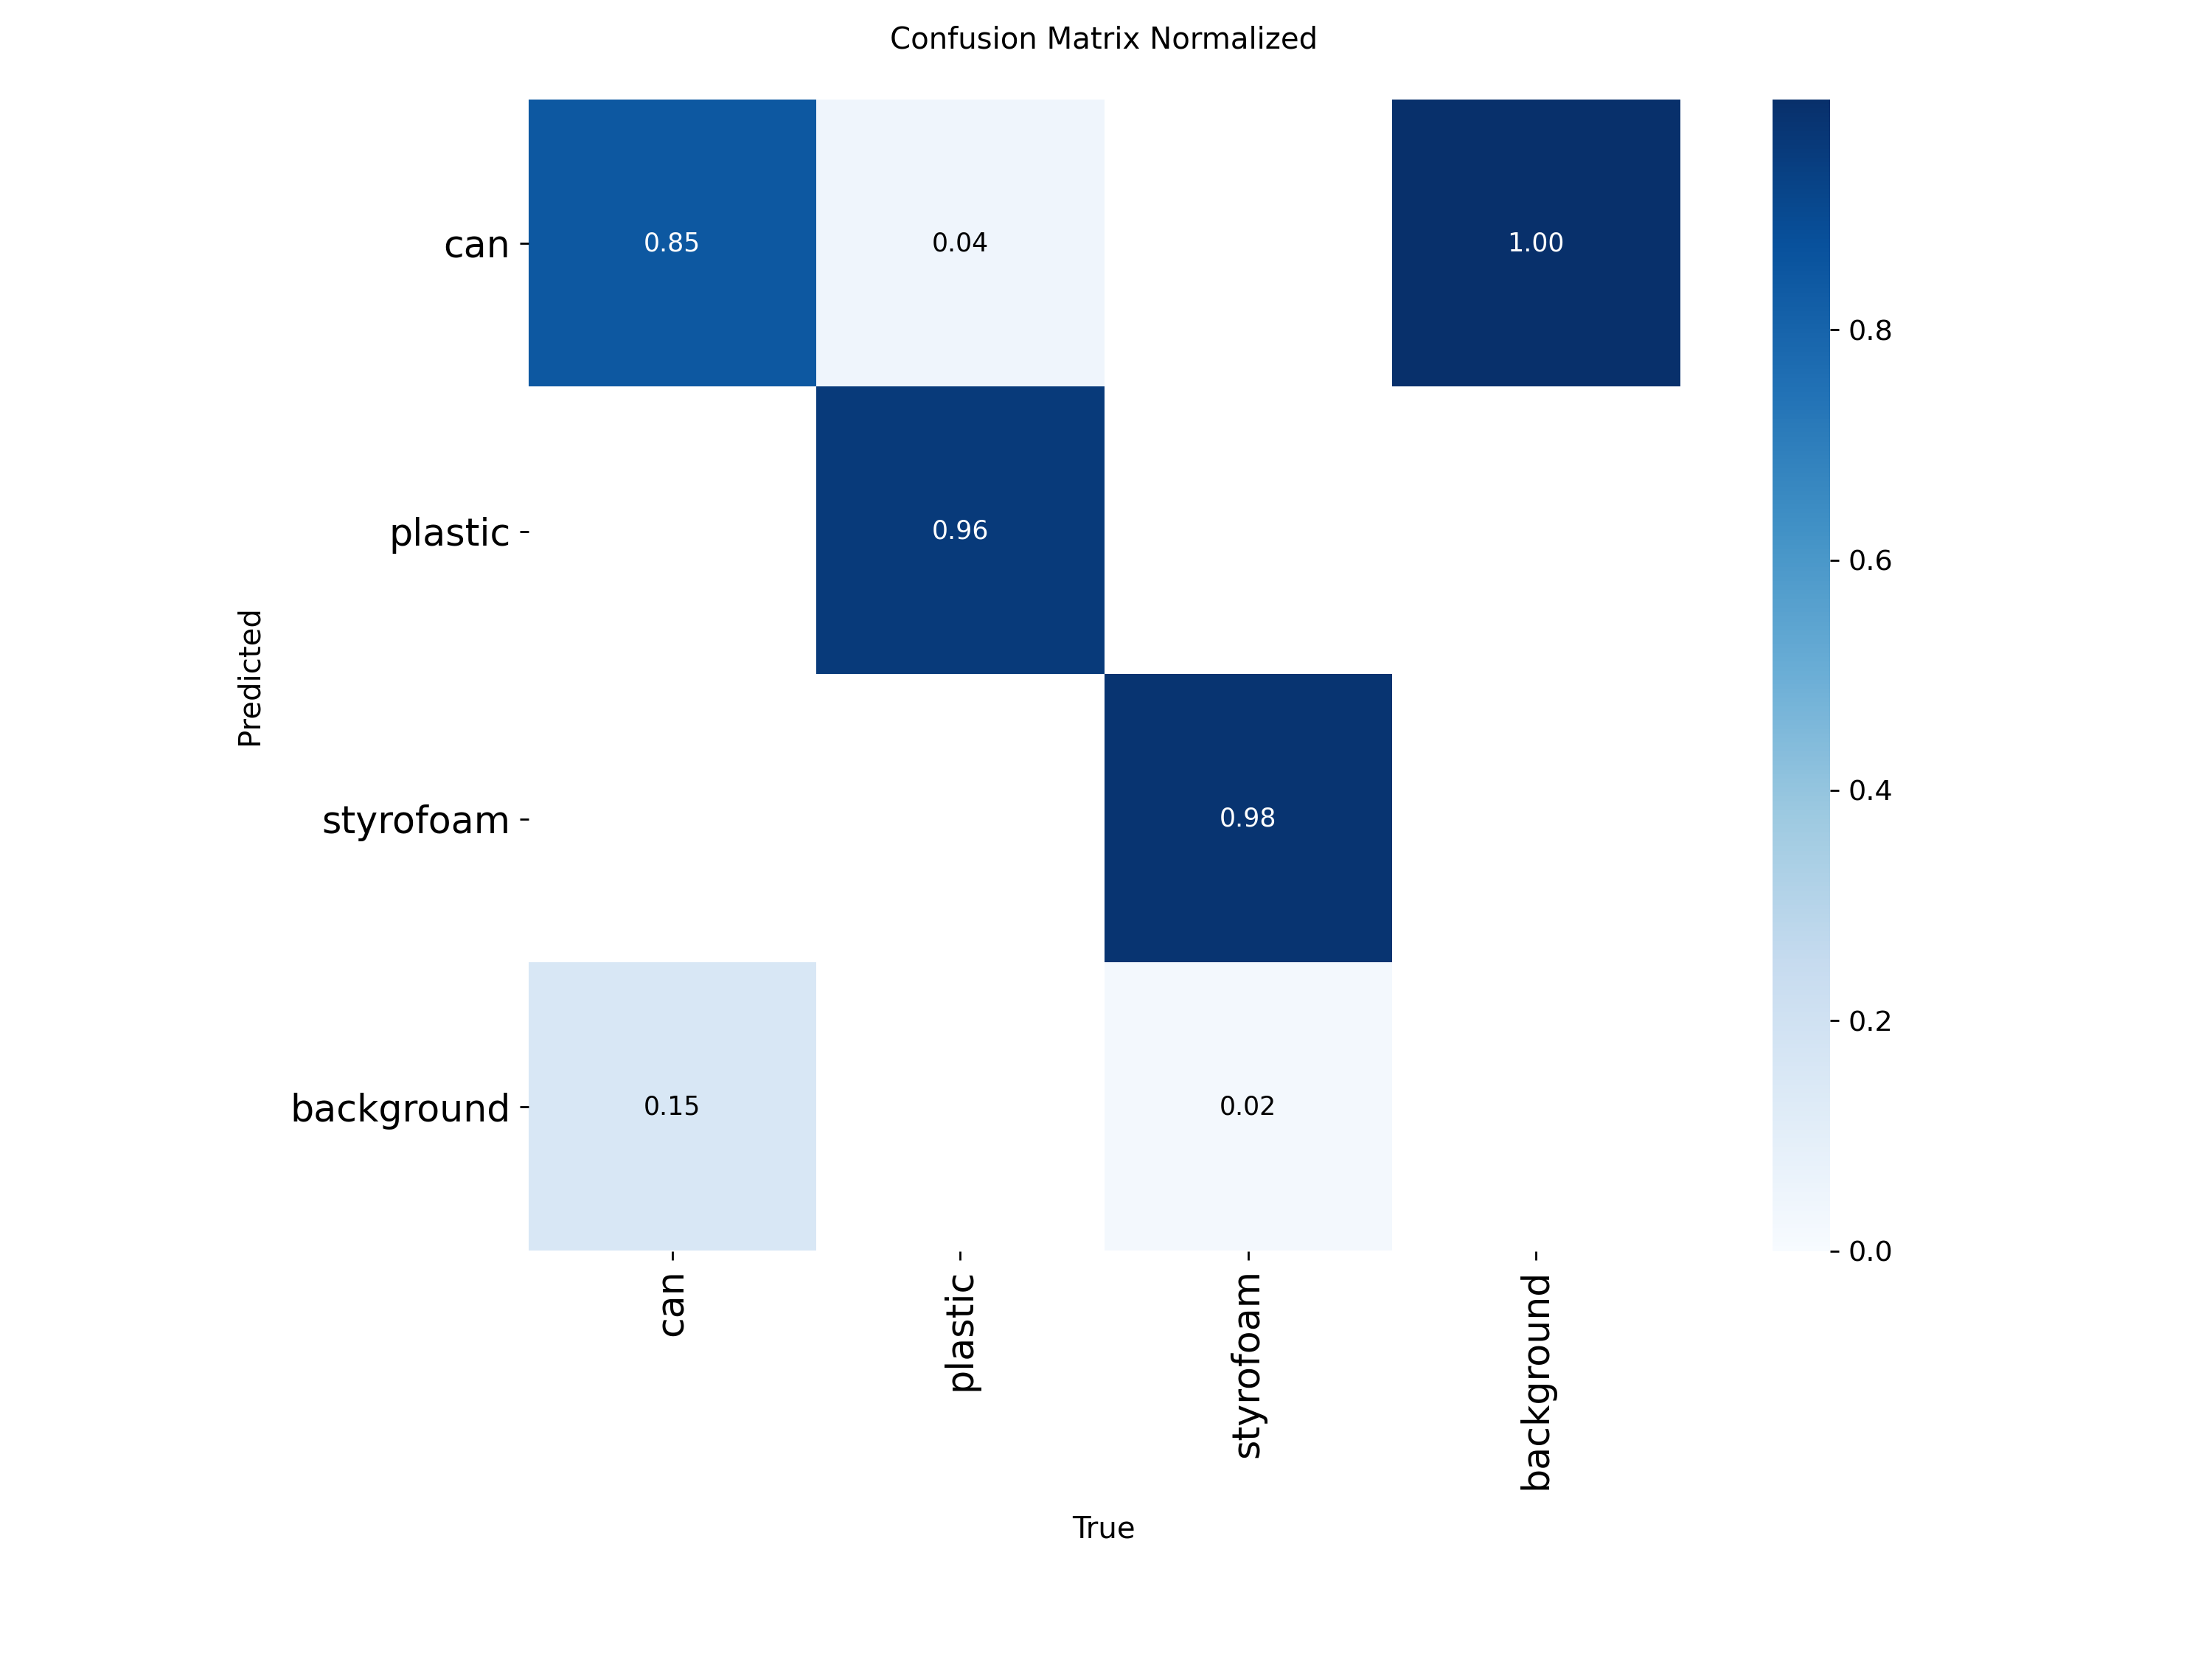

In [7]:
# 에러나면 왼쪽 파일탐색기를 확인하여 경로 수정
Image(filename=f'/content/g_drive/MyDrive/yolo_workdir/train15/confusion_matrix_normalized.png', width=600)

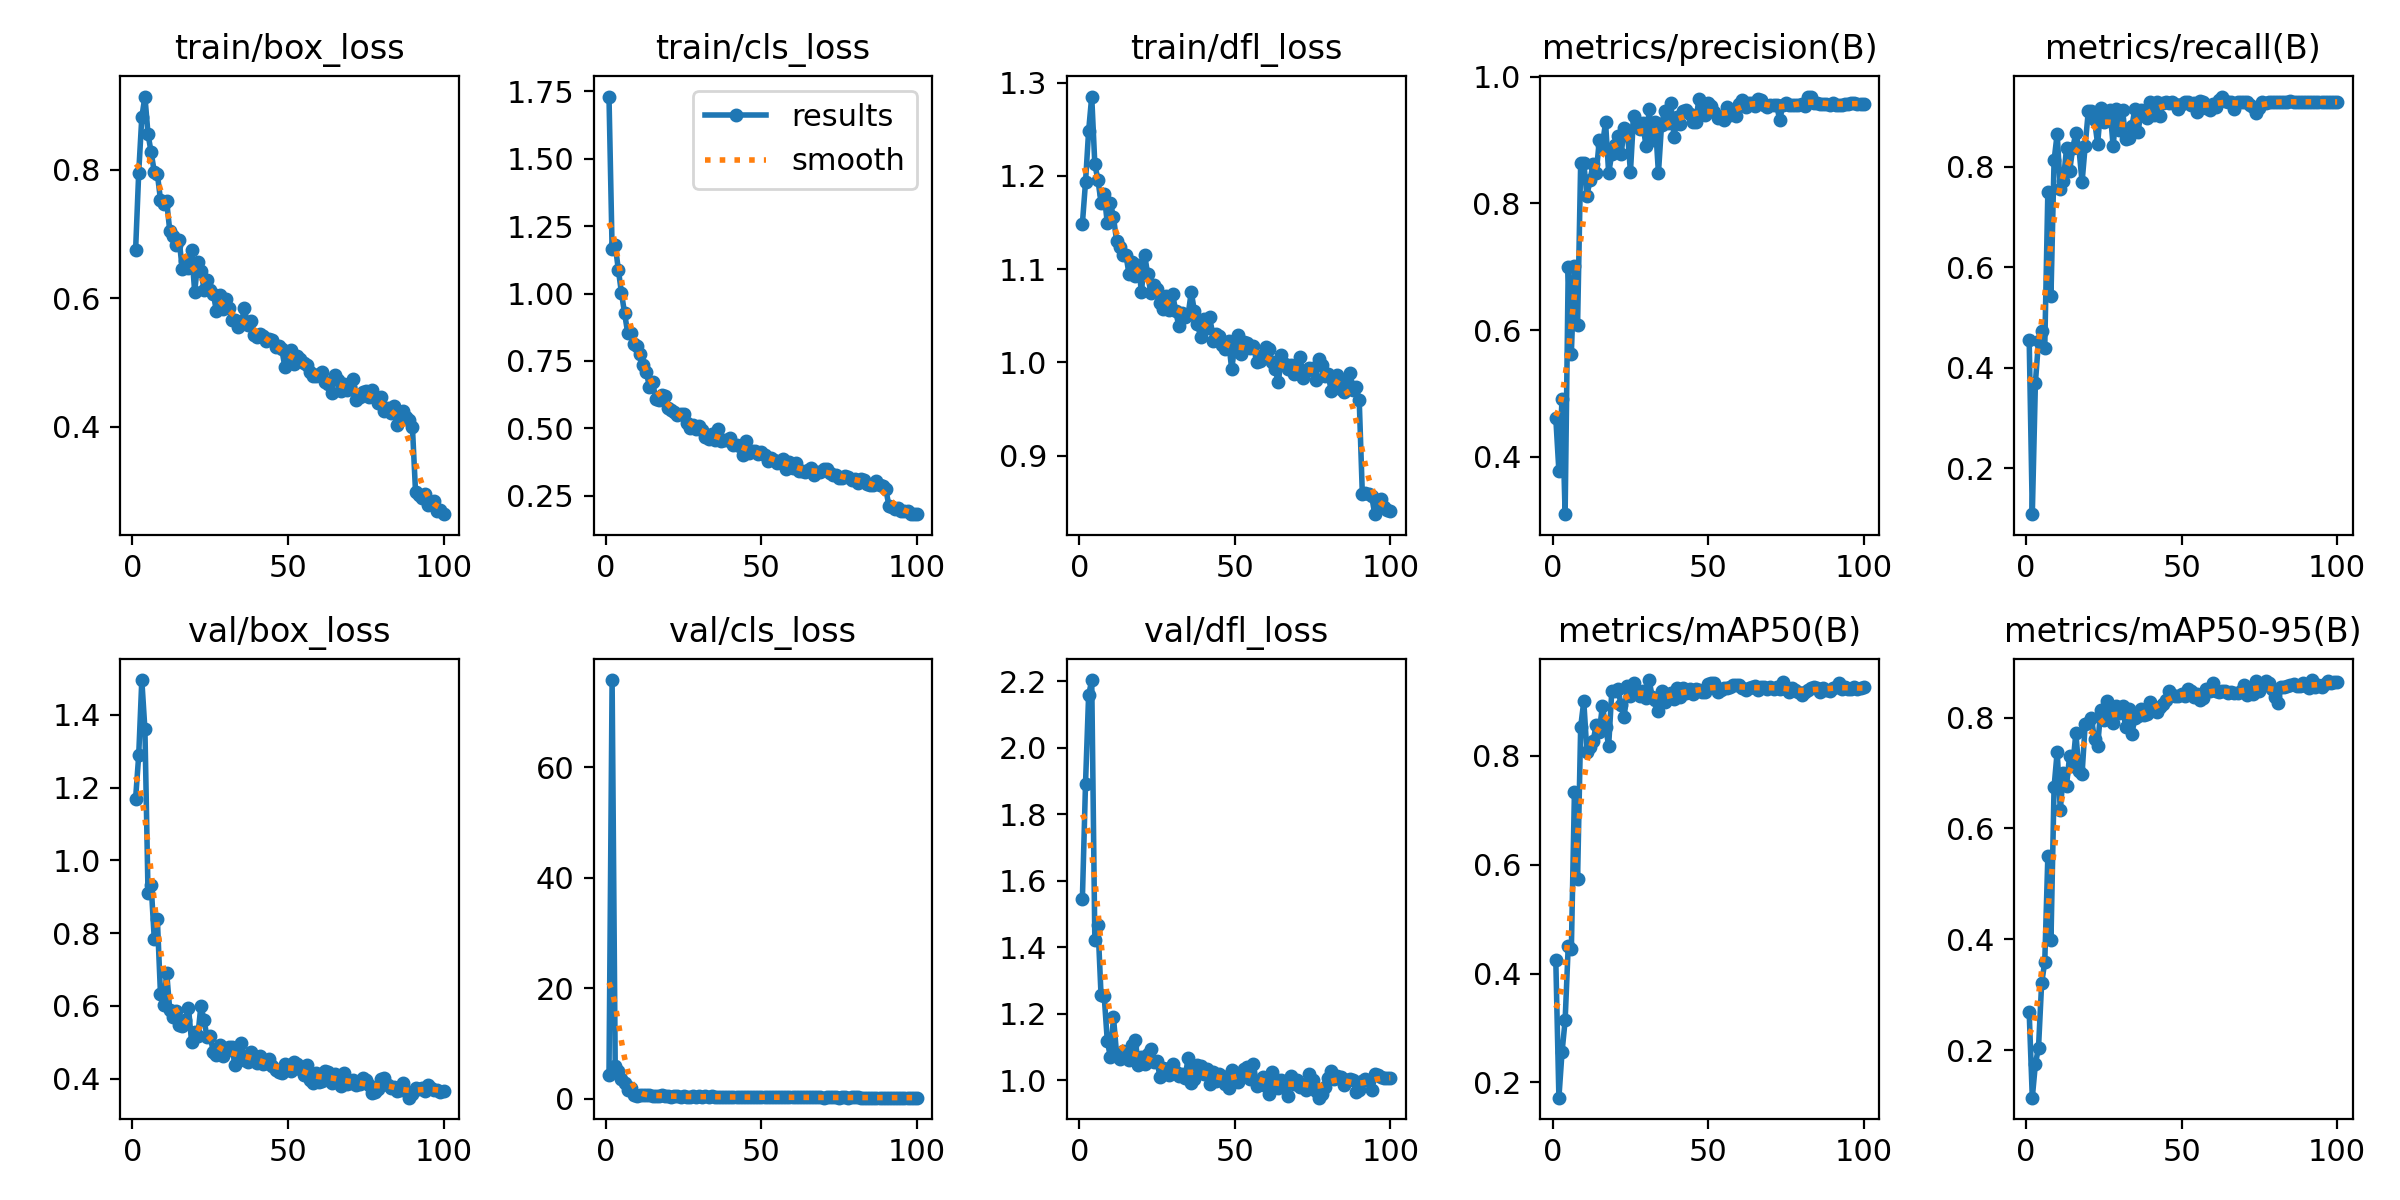

In [8]:
# 에러나면 왼쪽 파일탐색기를 확인하여 경로 수정
Image(filename=f'/content/g_drive/MyDrive/yolo_workdir/train15/results.png', width=600)

* 검증데이터셋(val)을 이용한 모델평가 <br>
yolo_workdir 에서도 보여주기

In [ ]:
# yaml 파일 경로 주의
!yolo task=detect mode=val model=/content/g_drive/MyDrive/yolo_workdir/train16/weights/best.pt \
data=/content/dataset/data.yaml \
project=/mydrive/yolo_workdir

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1249.0±452.6 MB/s, size: 481.0 KB)
val: Scanning /content/dataset/val/labels.cache... 90 images, 0 backgrounds, 0 corrupt: 100% 90/90 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:02<00:00,  2.01it/s]
                   all         90        103      0.956      0.929      0.934      0.868
                   can         25         26      0.873      0.846      0.852       0.81
             styrofoam         24         24      0.997      0.958      0.962      0.812
               plastic         42         53      0.996      0.981      0.989      0.982
Speed: 0.9ms preprocess, 18.1ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to /mydrive/yolo_workdir/val11
💡 Learn more at https://do

* 테스트데이터셋(test)을 이용한 모델평가

In [ ]:
# 모델 best.pt 또는 last.pt 경로 주의
# conf값 조절 가능(값 0~1)
# source를 테스트 데이터 세트 경로로 설정
!yolo task=detect mode=predict model=/content/g_drive/MyDrive/yolo_workdir/train16/weights/best.pt conf=0.7 \
source=/content/dataset/test/images \
project=/content/dataset

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/90 /content/dataset/test/images/00f3571f-16_X220_C556_0114_1.jpg: 480x640 1 plastic, 54.8ms
image 2/90 /content/dataset/test/images/01ea03d7-23_X003_C012_1016_1.jpg: 480x640 1 styrofoam, 28.0ms
image 3/90 /content/dataset/test/images/02b88fd8-23_X003_C012_1111_2.jpg: 480x640 1 styrofoam, 27.9ms
image 4/90 /content/dataset/test/images/02c7394b-23_X002_C802_0221_0.jpg: 640x480 1 styrofoam, 47.4ms
image 5/90 /content/dataset/test/images/02ce913c-22_X017_C900_1104_3.jpg: 480x640 1 can, 29.1ms
image 6/90 /content/dataset/test/images/03c6d13e-24_X107_C099_0320_4.jpg: 384x640 1 styrofoam, 69.8ms
image 7/90 /content/dataset/test/images/0a1af5c4-16_X326_C509_0401_1.jpg: 640x480 1 plastic, 28.6ms
image 8/90 /content/dataset/test/images/0a239902-23_X002_C208_1030_2.jpg: 480x640 1 styrofoam, 29.3ms
image 9/90 /content/dataset/

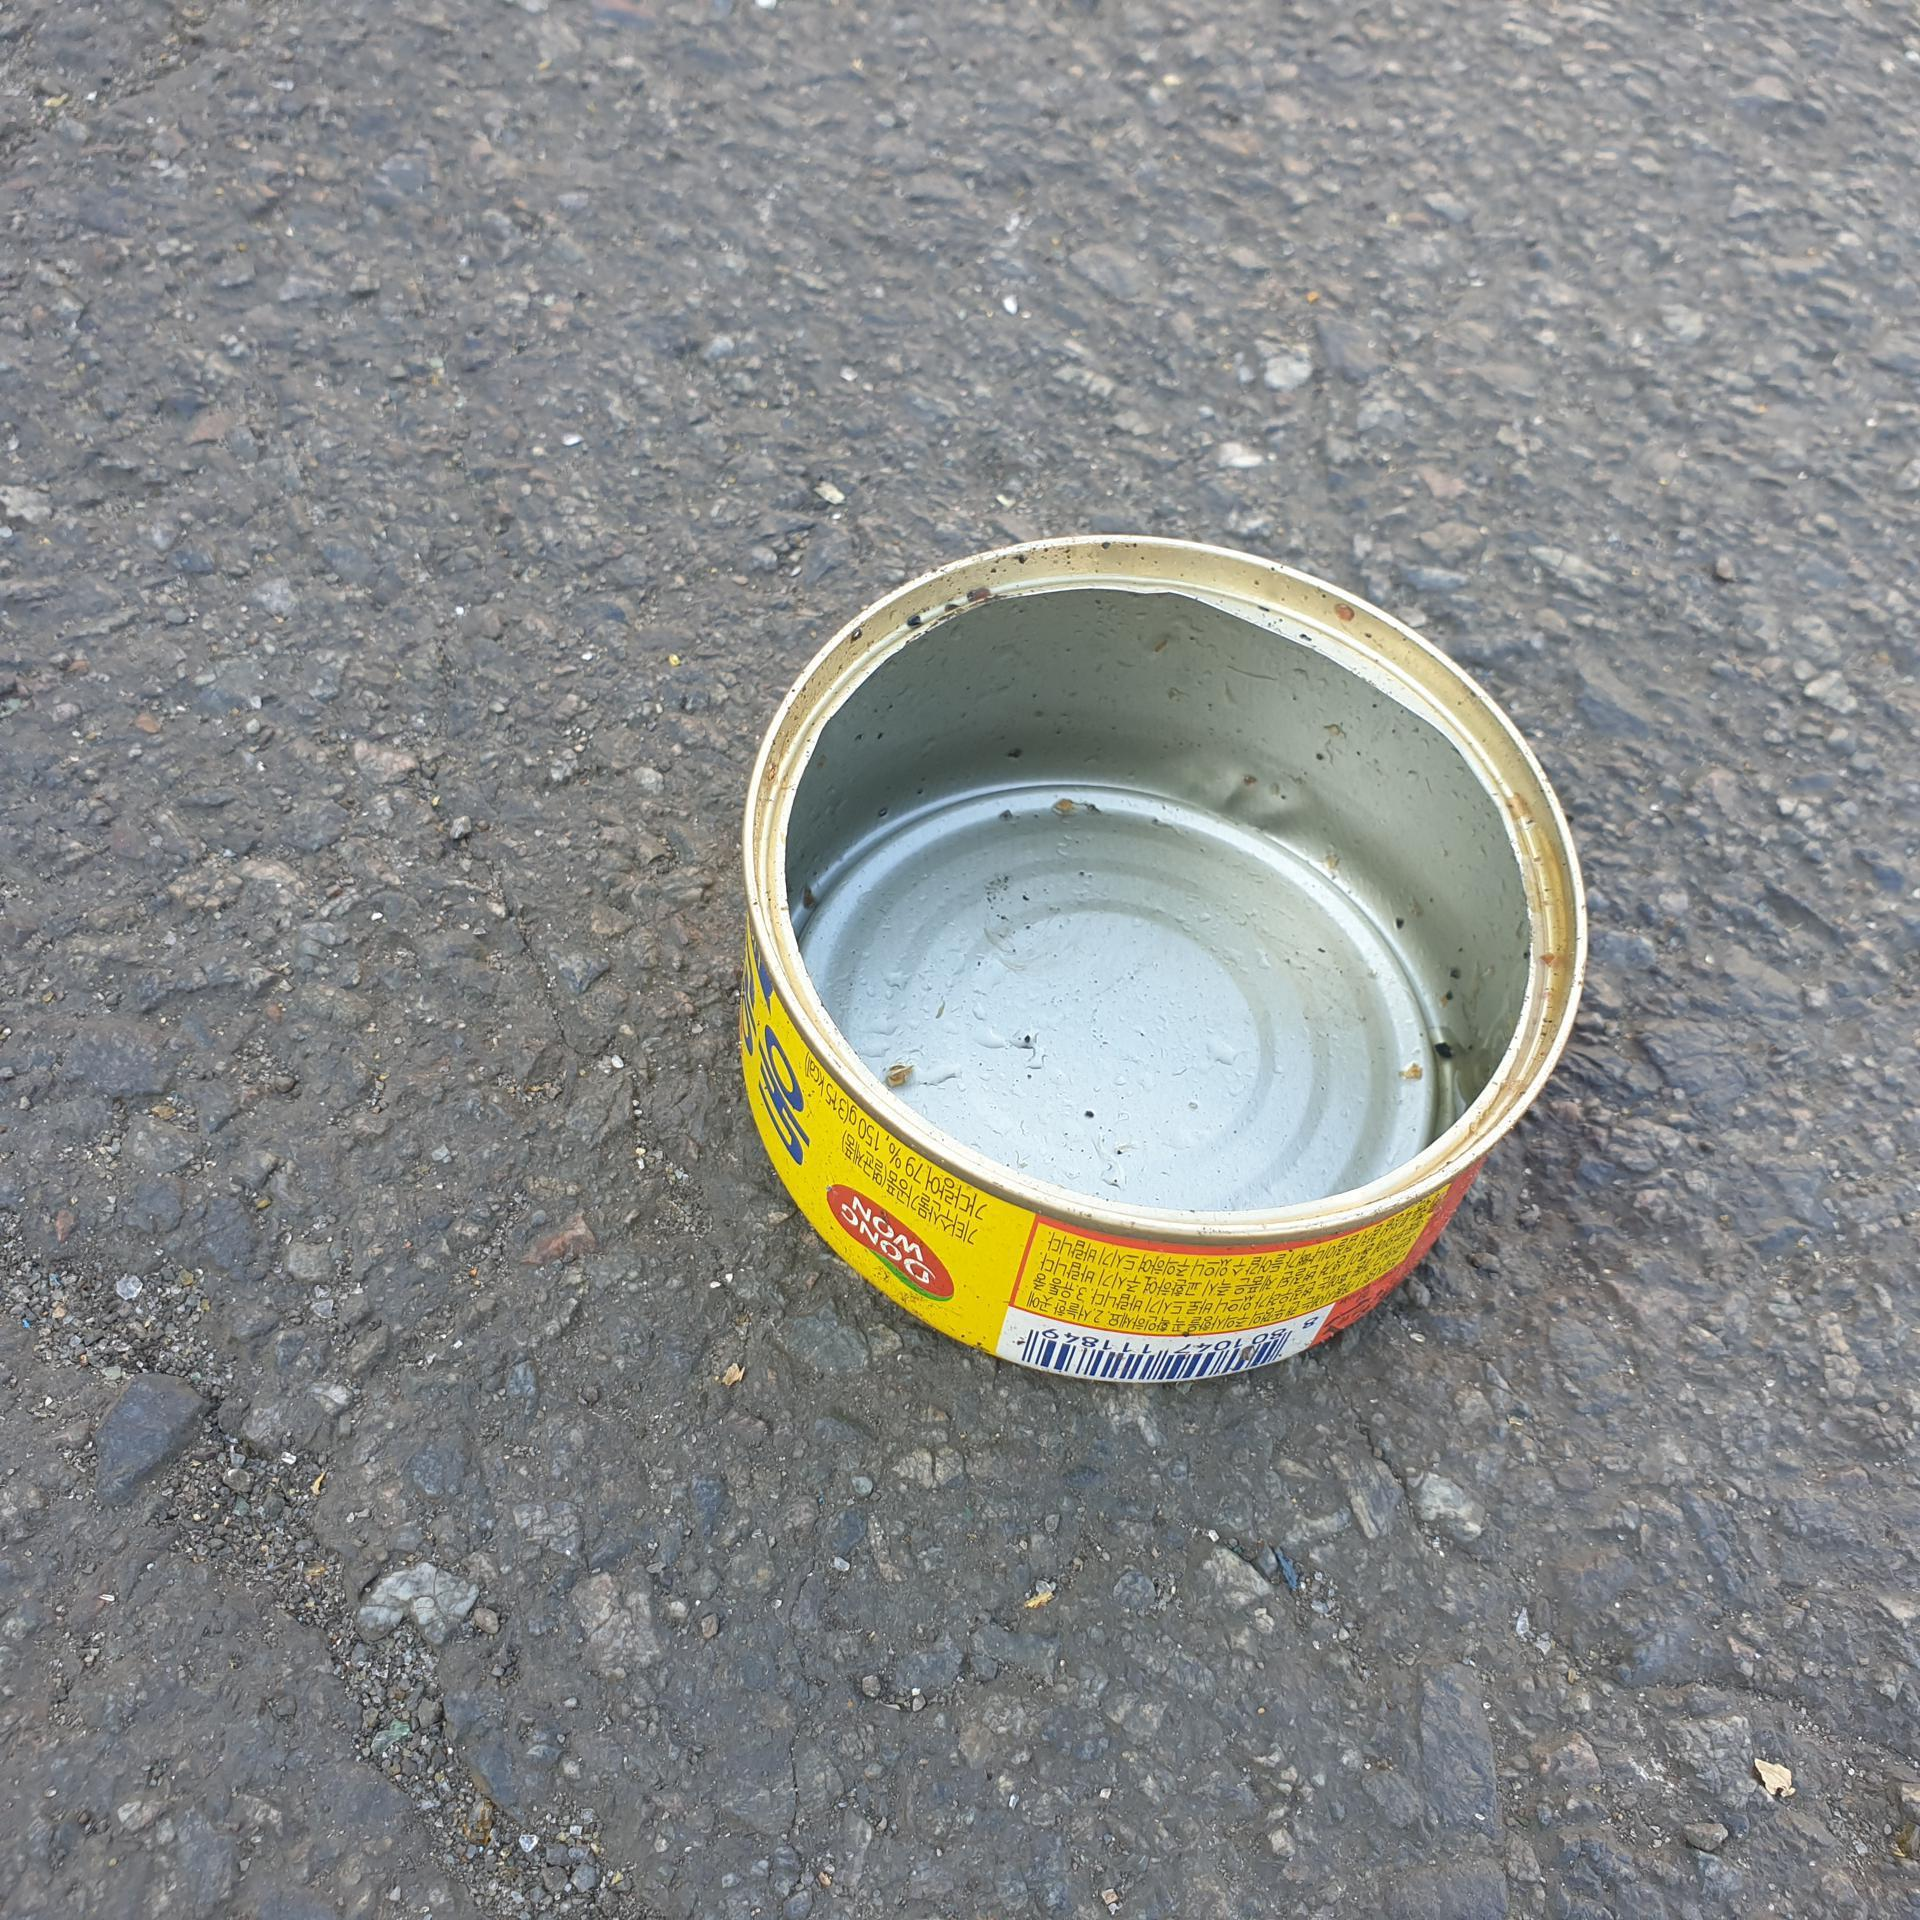

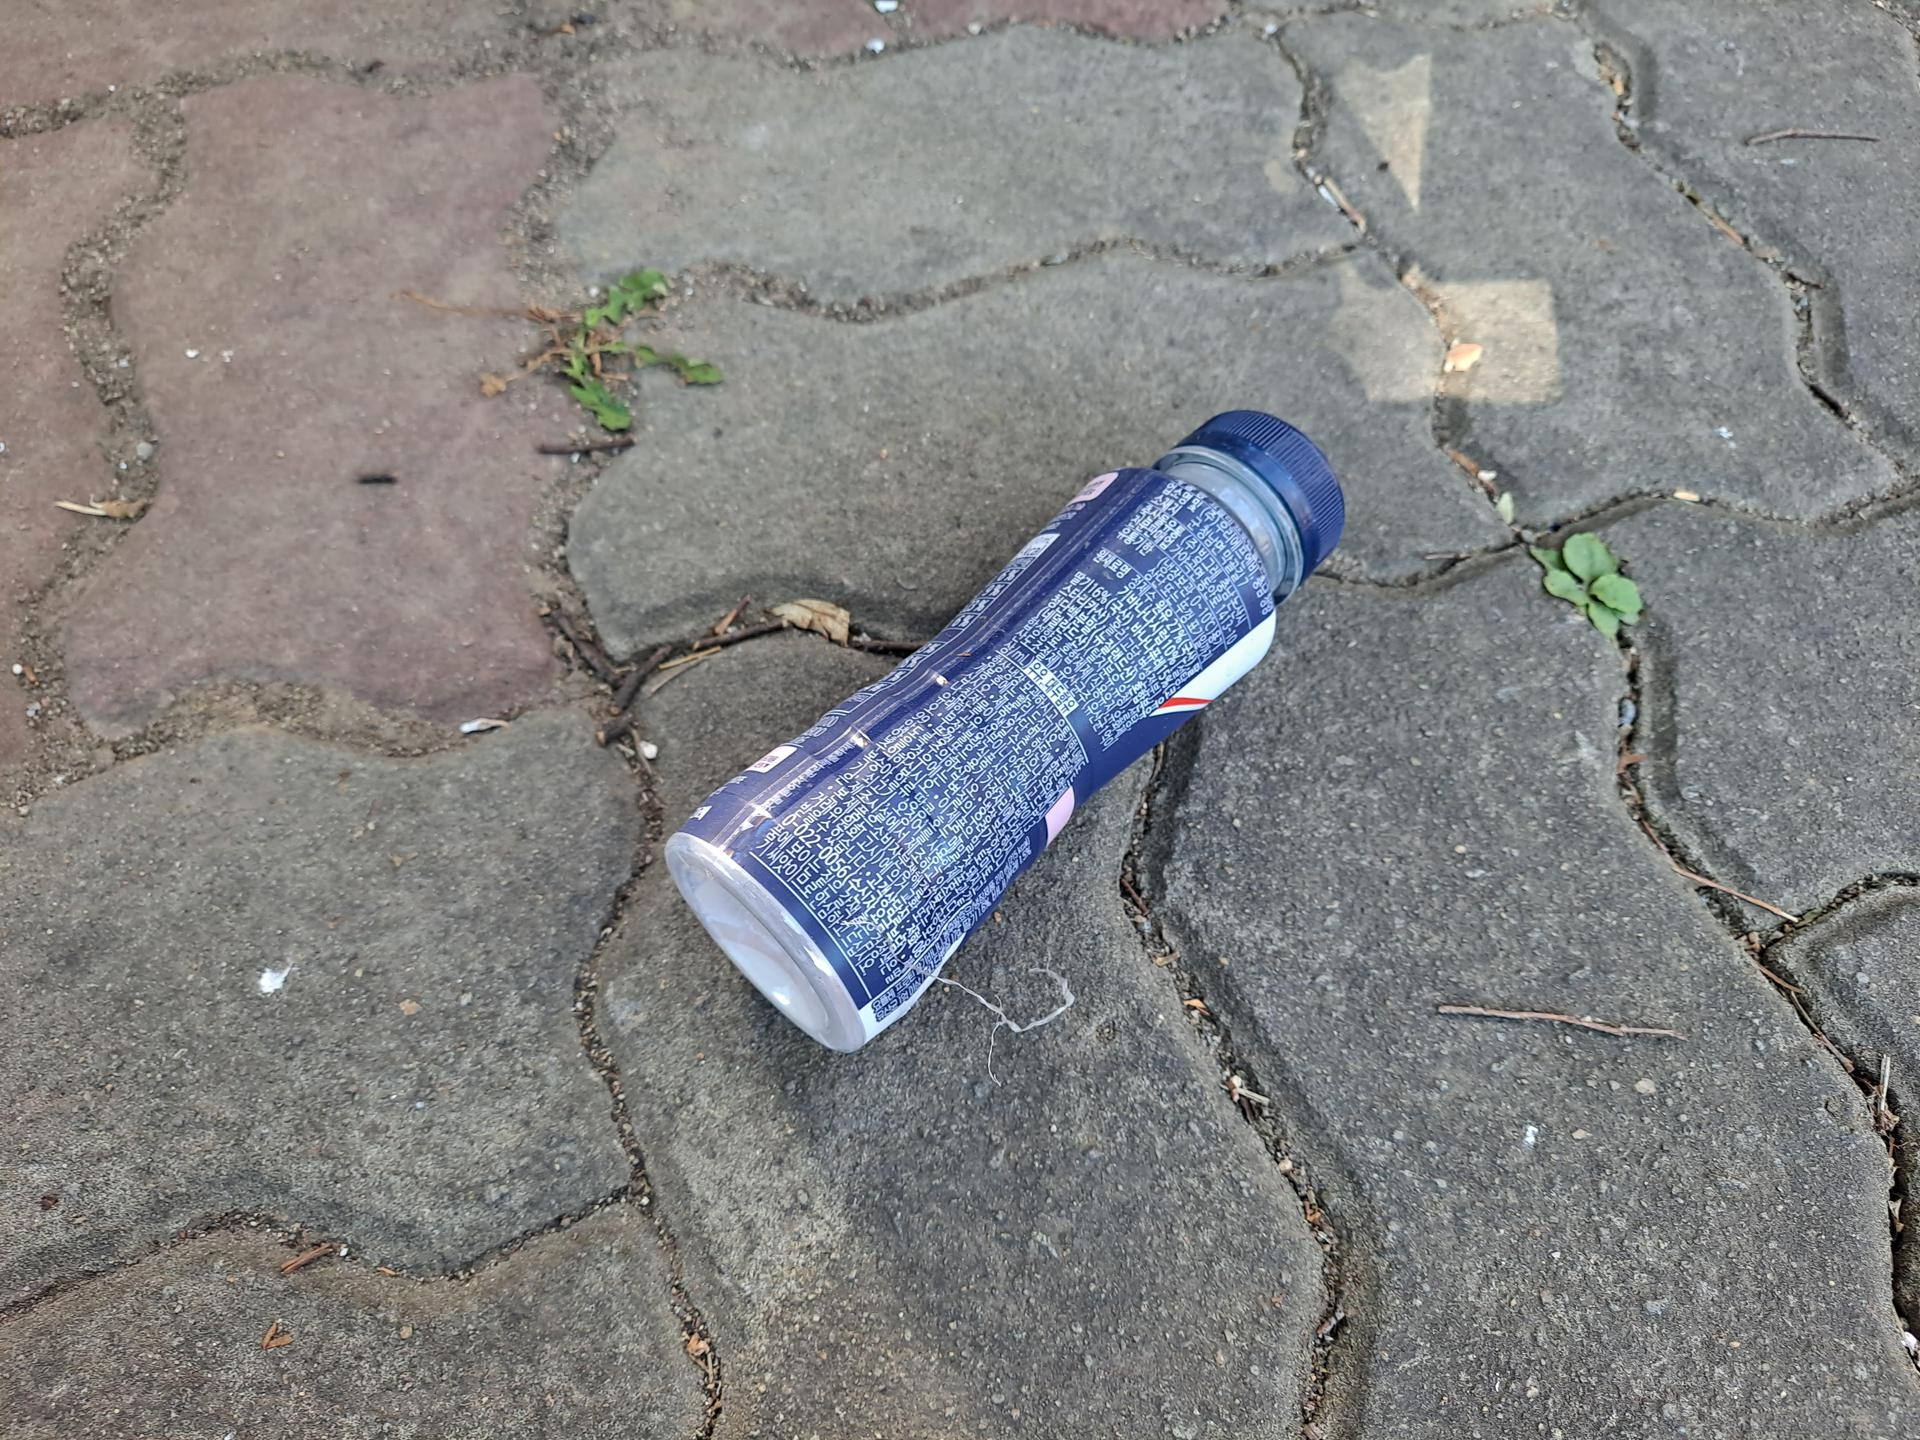

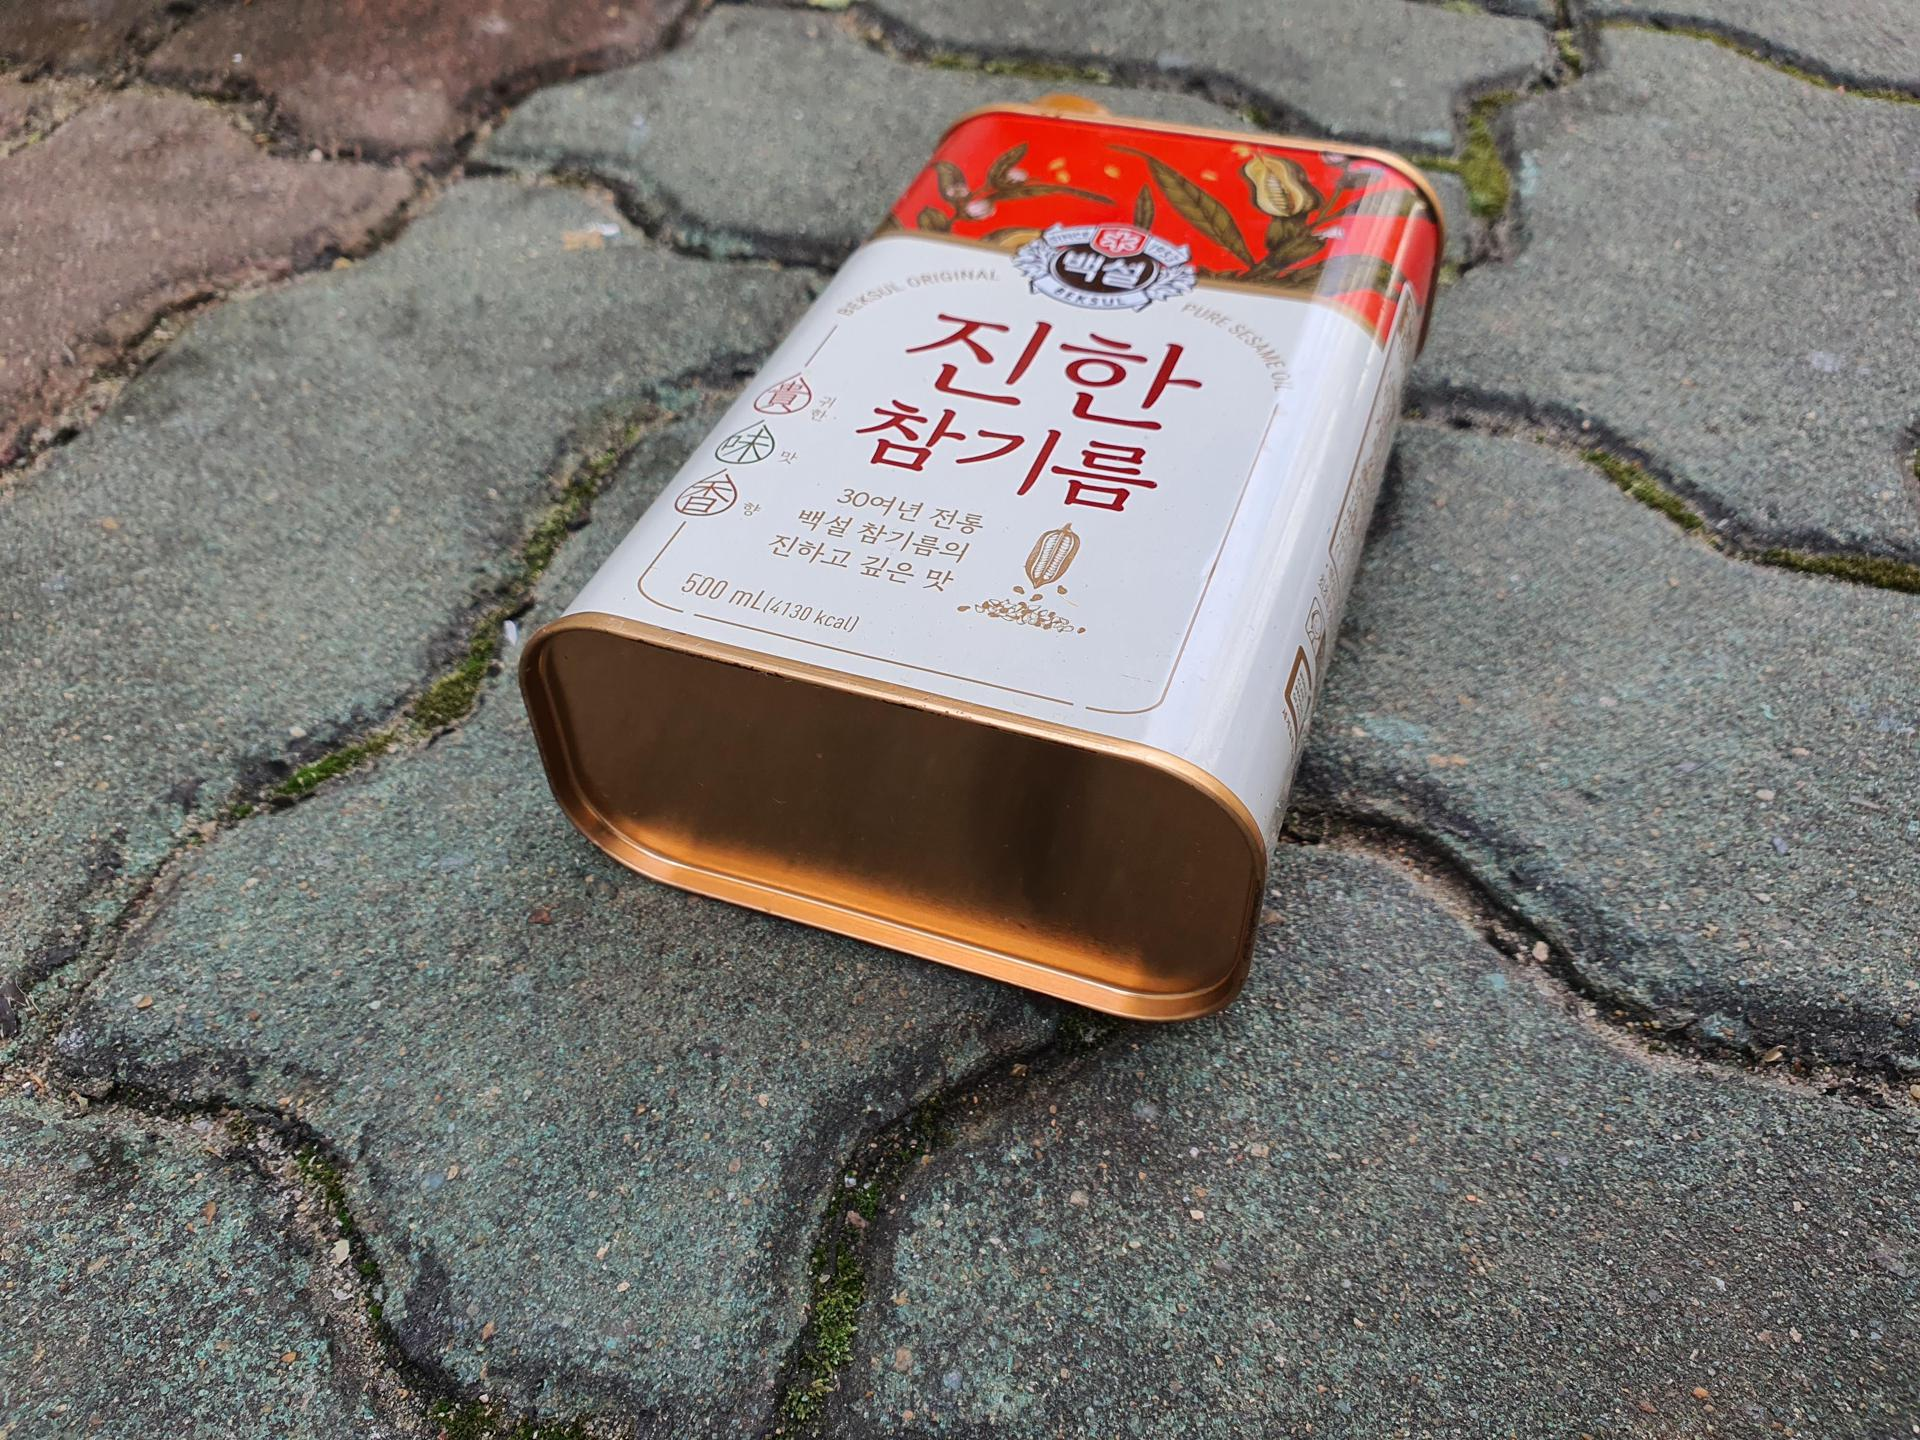

In [9]:
# 테스트 데이터 세트에 대한 추론 결과 중 상위 3개 출력
# 출력이 되지 않으면 왼쪽 파일탐색기를 확인하여 경로 수정 또는 파일 확장자 확인
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/dataset/test/images/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
# 모델 best.pt 또는 last.pt 경로 주의
# conf값 조절 가능(값 0~1)
# source를 테스트 데이터 세트 경로로 설정
!yolo task=detect mode=predict model=/content/g_drive/MyDrive/yolo_workdir/train16/weights/best.pt conf=0.7 \
source=/content/dataset/test/images/00f3571f-16_X220_C556_0114_1.jpg \
project=/mydrive/yolo_workdir

Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/dataset/test/images/00f3571f-16_X220_C556_0114_1.jpg: 480x640 1 plastic, 55.7ms
Speed: 3.2ms preprocess, 55.7ms inference, 172.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /mydrive/yolo_workdir/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


동영상도 Colab 내에서 출력할 수 있으나 yolo의 추론 결과가 avi파일이므로 mp4로 변환하는 과정이 필요함. 시간이 소요되므로 아래에 방법만 안내함. <br>
```python
# ffmpeg로 AVI → MP4 변환
!ffmpeg -i {추론 영상 경로} \
        -vcodec libx264 -acodec aac \
        {변환된 영상 경로}

from IPython.display import Video

# 동영상 파일 경로 지정
video_path = '{변환된 영상 경로}'

# 동영상 재생
Video(video_path, embed=True)
```

### 5. 공유 및 배포<br>
* '모델 학습 및 모델 평가' 코드에서는 삭제함

In [10]:
# gradio 설치
!pip install gradio

In [11]:
# 압축파일 PS_dataset.zip 을 dataset 폴더에 풀기
!mkdir -p /content/gradio
!cp /content/g_drive/MyDrive/yolo_workdir/train15/weights/best.pt /content/gradio/best.pt
# example 파일 /content/gradio 로 이동!  mv 명령을 통해 이동을 자동화할 수 있음

In [20]:
import gradio as gr
import cv2
import random
from ultralytics import YOLO
from PIL import Image


#------- 모델, 예제 경로 설정 및 conf, iou 기본값 설정 -------#
model = YOLO('/content/g_drive/MyDrive/yolo_workdir/train15/weights/best.pt')   # 모델 경로 및 파일명 변경하세요
image_ex_path = [
    ['/content/dataset/test/images/1f1a8d95-22_X001_C205_1105_4.jpg', 0.75, 0.5],
    ['/content/dataset/test/images/0f315242-22_X004_C509_0124_3.jpg', 0.75, 0.5],
    ['/content/dataset/test/images/1dedf81e-16_X252_C500_0325_3.jpg', 0.75, 0.5],
    ['/content/dataset/test/images/1b2760ee-16_X166_C509_0401_4.jpg', 0.75, 0.5],
    ['/content/dataset/test/images/1cbb5ddf-23_X011_C509_0511_1.jpg', 0.75, 0.5],
    ['/content/dataset/test/images/2b3d242c-24_X101_C501_0329_0.jpg', 0.75, 0.5],
    ]   # 예제 파일 경로 및 파일명 변경하세요


#------- 라벨 갯수에 따라 라벨 색성 설정 -------#
label_colors = []
for i in range(len(model.names)):
    random_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    label_colors.append(random_color)


#------- 입력 이미지 추론 -------#
def predict_image(image_path, conf_threshold, iou_threshold):
    image = cv2.imread(image_path)
    outputs = model.predict(source=image_path, conf=conf_threshold, iou=iou_threshold)
    results = outputs[0].cpu().numpy()

    for i, det in enumerate(results.boxes.xyxy):
        x1, y1, x2, y2 = map(int, det)
        label = model.names[int(results.boxes.cls[i])]
        label_idx = int(results.boxes.cls[i])
        conf = round(float(results.boxes.conf[i]), 2)

        # 라벨에 따라 색상 선택
        box_color = label_colors[label_idx]

        # 경계 상자 그리기 (image에 직접 그림)
        cv2.rectangle(image, (x1, y1), (x2, y2), box_color, 2, cv2.LINE_AA)

        # 라벨 텍스트 설정
        label_text = f"{label} {conf:.2f}"
        (label_width, label_height), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)

        # 라벨 배경 그리기 (image에 직접 그림)
        cv2.rectangle(image, (x1, y1-label_height-3), (x1+label_width, y1), box_color, -1)

        # 라벨 텍스트 출력 (image에 직접 출력)
        cv2.putText(image, label_text, (x1, y1-3), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # 변환된 이미지 반환
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


#------- gradio 인터페이스 -------#
input_image = [
    gr.Image(type="filepath", label="Input Image"),
    gr.Slider(minimum=0, maximum=1, value=0.75, label="Confidence threshold"),
    gr.Slider(minimum=0, maximum=1, value=0.5, label="IoU threshold")
]

output_image = [
    gr.Image(type="pil", label="Output Image")
]

interface_image = gr.Interface(
    fn=predict_image,
    inputs=input_image,
    outputs=output_image,
    title="해양 쓰레기 감지(해쓰감)",
    examples=image_ex_path,
    cache_examples=False
)

#------- 입력 영상 추론 -------#
def predict_video(video_path, conf_threshold, iou_threshold):
    cap = cv2.VideoCapture(video_path)
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)

    import tempfile
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.mp4')
    out = cv2.VideoWriter(temp_file.name, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        outputs = model(frame, conf=conf_threshold, iou=iou_threshold)[0]

        if outputs.boxes is not None and len(outputs.boxes) > 0:
            boxes = outputs.boxes.xyxy.cpu().numpy()
            classes = outputs.boxes.cls.cpu().numpy()
            confs = outputs.boxes.conf.cpu().numpy()

            for i, box in enumerate(boxes):
                x1, y1, x2, y2 = map(int, box)
                label_idx = int(classes[i])
                conf = float(confs[i])
                label = model.names[label_idx]
                box_color = label_colors[label_idx]

                cv2.rectangle(frame, (x1, y1), (x2, y2), box_color, 2)
                label_text = f"{label} {conf:.2f}"
                (tw, th), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                cv2.rectangle(frame, (x1, y1 - th - 3), (x1 + tw, y1), box_color, -1)
                cv2.putText(frame, label_text, (x1, y1 - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

        out.write(frame)

    cap.release()
    out.release()
    return temp_file.name


#------- gradio 인터페이스 -------#
input_video = [
    gr.Video(label="Input Video"),
    gr.Slider(minimum=0, maximum=1, value=0.65, label="Confidence threshold"),
    gr.Slider(minimum=0, maximum=1, value=0.5, label="IoU threshold")
]

output_video = [
    gr.Video(label="Output Video")
]

interface_video = gr.Interface(
    fn=predict_video,
    inputs=input_video,
    outputs=output_video,
    title="해양 쓰레기 감지",
    description="기다리는동안 여유로운 티타임 어떠신가요?",
    cache_examples=False
)

gr.TabbedInterface(
    [interface_image, interface_video],
    tab_names=['Image inference(사진)', 'Video inference(영상)']
).queue().launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9fac3cba18662a2b4c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
